In [142]:
# Clustering provides a means for data scientists to extract insightful information from meaningless datasets. 
# By clustering the dataset, it can be labelled and these labels can be used to model the behavior of the data 
# points or create visualization charts to effectively distinguish different points on the dataset. In the midst of 
# chaotic confusion that is brought forth by unlabeled datasets, K-means clustering is a great approach to establish
# structure to these datasets.

1 Required
Once you have selected a data set, you will produce a report containing the sections listed below:



#1. Introduction

• A. Outline the main objectives of the analysis and research question.
• B. Detail the context of the research question and previous findings.


# 2.1 )basic summary of the analysis steps and variables are available -DONE
#2.2) technical features of the dataset you chose and a summary of its attributes.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as mtp 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# F500_df 

In [10]:
F500_df= pd.read_csv(r"Fortune 500 2017 - Fortune 500.csv")
print(F500_df.shape)  #(5110, 12)
F500_df.head()

(500, 23)


,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


# dimensions of dataset

In [11]:
F500_df.shape

(500, 23)

In [12]:
F500_df.columns

Index(['Rank', 'Title', 'Website', 'Employees', 'Sector', 'Industry',
       'Hqlocation', 'Hqaddr', 'Hqcity', 'Hqstate', 'Hqzip', 'Hqtel', 'Ceo',
       'Ceo-title', 'Address', 'Ticker', 'Fullname', 'Revenues', 'Revchange',
       'Profits', 'Prftchange', 'Assets', 'Totshequity'],
      dtype='object')

In [13]:
F500_df.isnull().sum()

Rank           0
Title          0
Website        0
Employees      0
Sector         0
Industry       0
Hqlocation     0
Hqaddr         0
Hqcity         0
Hqstate        0
Hqzip          0
Hqtel          0
Ceo            0
Ceo-title      0
Address        0
Ticker         0
Fullname       0
Revenues       0
Revchange      0
Profits        0
Prftchange     0
Assets         0
Totshequity    0
dtype: int64

In [14]:
F500_df.duplicated().sum()

0

In [15]:
F500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         500 non-null    int64  
 1   Title        500 non-null    object 
 2   Website      500 non-null    object 
 3   Employees    500 non-null    int64  
 4   Sector       500 non-null    object 
 5   Industry     500 non-null    object 
 6   Hqlocation   500 non-null    object 
 7   Hqaddr       500 non-null    object 
 8   Hqcity       500 non-null    object 
 9   Hqstate      500 non-null    object 
 10  Hqzip        500 non-null    int64  
 11  Hqtel        500 non-null    object 
 12  Ceo          500 non-null    object 
 13  Ceo-title    500 non-null    object 
 14  Address      500 non-null    object 
 15  Ticker       500 non-null    object 
 16  Fullname     500 non-null    object 
 17  Revenues     500 non-null    int64  
 18  Revchange    500 non-null    float64
 19  Profits 

# Summarizing

In [16]:
F500_df.describe()

,Rank,Employees,Hqzip,Revenues,Revchange,Profits,Assets,Totshequity
count,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,5.000000e+02,500.0000
mean,250.492000,5.635013e+04,46791.714000,24111.748000,3.75800,1779.479800,8.038934e+04,13640.1470
std,144.477366,1.234520e+05,30160.384765,38337.353337,19.96748,3937.558721,2.704257e+05,30523.1538
min,1.000000,8.300000e+01,1104.000000,5145.000000,-57.50000,-6177.000000,4.370000e+02,-12688.0000
25%,125.750000,1.190000e+04,19099.000000,7245.000000,-3.82500,235.725000,8.436500e+03,1997.5000
50%,250.500000,2.500000e+04,46244.500000,11384.000000,1.90000,683.600000,1.932450e+04,4981.0000
75%,375.250000,5.682525e+04,75045.000000,22605.250000,7.32500,1770.775000,4.812600e+04,12467.7500
max,500.000000,2.300000e+06,98188.000000,485873.000000,197.30000,45687.000000,3.287968e+06,283001.0000


In [17]:
F500_df.nunique()

Rank           497
Title          500
Website        499
Employees      399
Sector          21
Industry        73
Hqlocation     246
Hqaddr         491
Hqcity         239
Hqstate         37
Hqzip          372
Hqtel          499
Ceo            496
Ceo-title       12
Address        494
Ticker         468
Fullname       500
Revenues       495
Revchange      287
Profits        494
Prftchange     377
Assets         498
Totshequity    496
dtype: int64

In [18]:
F500_df.isnull().sum()

Rank           0
Title          0
Website        0
Employees      0
Sector         0
Industry       0
Hqlocation     0
Hqaddr         0
Hqcity         0
Hqstate        0
Hqzip          0
Hqtel          0
Ceo            0
Ceo-title      0
Address        0
Ticker         0
Fullname       0
Revenues       0
Revchange      0
Profits        0
Prftchange     0
Assets         0
Totshequity    0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1  Data Cleaning

In [192]:
F500_df.head(2)

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0


In [190]:
# Mapping by city
# .Count by Cities, Top30 Profit  ##Hqlocation, and profit

In [194]:
df_city=pd.DataFrame(F500_df.groupby('Hqstate')['Profits'].sum().sort_values(ascending=False).head(20))

display(df_city.head())


df_city = df_city.reset_index(level=0)
# df_city

,Profits
Hqstate,
CA,208189.0
NY,153750.6
IL,42186.2
NJ,39673.8
VA,38179.8


,Title
Hqstate,
NY,54
CA,53
TX,50
IL,36
OH,25


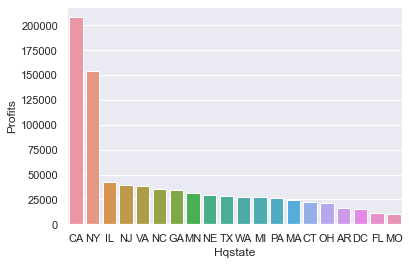

In [196]:

#city with Profit
sns.barplot(x = "Hqstate",y ="Profits",data = df_city)

###It seems like location does not depend on profit except Newyork. hence we will remove it.
df_city_by_company_Title = pd.DataFrame(F500_df.groupby('Hqstate')['Title'].count().sort_values(ascending=False).head(20))

display(df_city_by_company_Title.head())

# Hqlocation/HQ STATE ,
based on company situated there and profit it make -----> does not matter on location.

Text(0.5, 1.0, 'Profits based on state HQ and numbers of companies in that location')

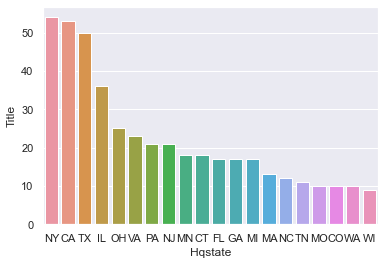

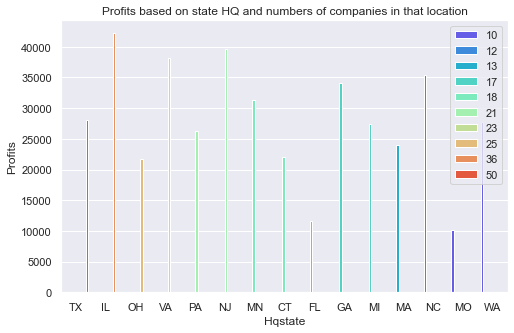

In [197]:
df_city_by_company_Title1 = df_city_by_company_Title.reset_index(level=0)
df_city_by_company_Title1
df_city_by_company_Title1.columns
#city with Profit
sns.barplot(x = "Hqstate",y ="Title",data = df_city_by_company_Title1)

# df_city = df_city.reset_index(level=0)
df_city
df_city_by_company_Title1 = df_city_by_company_Title.reset_index(level=0)
df_city_by_company_Title1
x = df_city_by_company_Title1.merge(df_city, how='inner', on='Hqstate')
x
x1 = x.iloc[2:,]
x1

plt.figure(figsize=(8,5))
sns.barplot(x='Hqstate',y='Profits',data=x1, palette='rainbow', hue='Title')
plt.legend(loc='upper right')
plt.title("Profits based on state HQ and numbers of companies in that location")

In [198]:

###Removed unnecessary column

F500_df1 = F500_df.drop(columns=(["Rank",'Website','Hqlocation','Hqaddr','Hqcity','Hqstate','Hqzip','Hqtel','Ceo','Ceo-title','Address','Ticker','Fullname']))
display(F500_df1.head(2))

,Title,Employees,Sector,Industry,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,Walmart,2300000,Retailing,General Merchandisers,485873,0.8,13643.0,-7.2,198825,77798.0
1,Berkshire Hathaway,367700,Financials,Insurance: Property and Casualty (Stock),223604,6.1,24074.0,0,620854,283001.0


# 2.2  ) DATA EXPLORATION (Data exploration, also known as exploratory data analysis (EDA),

Data exploration can be divided into data preprocessing and data visualization

For data preprocessing, we focus on four methods: 
1) univariate analysis, 
2) missing value treatment, ---There is no missing value in all the columns -
3) outlier treatment, 
4) collinearity treatment(Multicollinearity occurs when independent variables in a regression model are correlated.)



In [13]:
##################About Bivariate Analysis
# It is a methodical statistical technique applied to a pair of variables (features/ attributes) of data 
# to determine the empirical relationship between them.
# In order words, it is meant to determine any concurrent relations 
# (usually over and above a simple correlation analysis).

# 2.1) Methods of data exploration
# The protocol of data exploration



In [201]:
F500_df.head(2)

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0


In [202]:
F500_df.columns

Index(['Rank', 'Title', 'Website', 'Employees', 'Sector', 'Industry',
       'Hqlocation', 'Hqaddr', 'Hqcity', 'Hqstate', 'Hqzip', 'Hqtel', 'Ceo',
       'Ceo-title', 'Address', 'Ticker', 'Fullname', 'Revenues', 'Revchange',
       'Profits', 'Prftchange', 'Assets', 'Totshequity'],
      dtype='object')

In [203]:
F500_df.columns
F500_data = F500_df.copy()

# 1.Count by Sectors

<AxesSubplot:xlabel='Sector'>

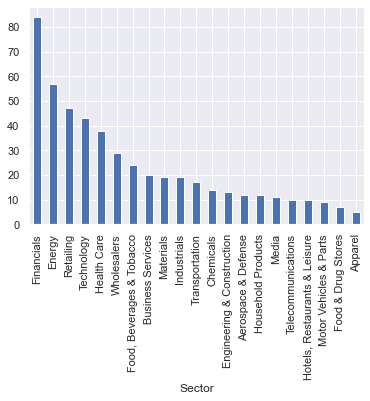

In [209]:

### Which sector has more count 
F500_data.groupby('Sector')['Sector'].count().sort_values(ascending=False).plot.bar()
#Finance has more sector 84 sectors

In [205]:
F500_result_Sector_Industry = (F500_data
           .groupby(['Sector','Industry'])
           .agg({'Employees':['sum', 'mean'],
                 'Revchange':['min','max']}))
 
# printing top 15 rows
F500_result_Sector_Industry.head(20)

# We can convert the hierarchical columns to non-hierarchical columns using the .to_flat_index method 

F500_result_Sector_Industry.columns = ['_'.join(cols).lower()
                     for cols in F500_result_Sector_Industry.columns.to_flat_index()]
F500_result_Sector_Industry.head(10)

employees_sum  \
Sector              Industry                                          
Aerospace & Defense Aerospace and Defense                    863840   
Apparel             Apparel                                  254650   
Business Services   Advertising, Marketing                   128300   
                    Diversified Outsourcing Services         384250   
                    Financial Data Services                  193900   
                    Miscellaneous                             12500   
                    Temporary Help                            51900   
                    Waste Management                          74200   
Chemicals           Chemicals                                364906   
Energy              Energy                                    42475   

                                                      employees_mean  \
Sector              Industry                                           
Aerospace & Defense Aerospace and Defense               71986.666667   
Apparel             Apparel                             50930.000000   
Business Services   Advertising, Marketing              64150.000000   
                    Diversified Outsourcing Services   128083.333333   
                    Financial Data Services             21544.444444   
                    Miscellaneous                       12500.000000   
                    Temporary Help                      17300.000000   
                    Waste Management                    37100.000000   
Chemicals           Chemicals                           26064.714286   
Energy              Energy                               6067.857143   

                                                      revchange_min  \
Sector              Industry                                          
Aerospace & Defense Aerospace and Defense                     -45.0   
Apparel             Apparel                                    -2.8   
Business Services   Advertising, Marketing                      1.9   
                    Diversified Outsourcing Services           -2.8   
                    Financial Data Services                    -1.1   
                    Miscellaneous                              -0.9   
                    Temporary Help                             -4.4   
                    Waste Management                            3.0   
Chemicals           Chemicals                                 -19.5   
Energy              Energy                                    -30.1   

                                                      revchange_max  
Sector              Industry                                         
Aerospace & Defense Aerospace and Defense                       9.8  
Apparel             Apparel                                     5.8  
Business Services   Advertising, Marketing                      3.1  
                    Diversified Outsourcing Services            1.7  
                    Financial Data Services                    40.1  
                    Miscellaneous                              -0.9  
                    Temporary Help                              3.1  
                    Waste Management                            5.0  
Chemicals           Chemicals                                  94.5  
Energy              Energy                                      4.0

<AxesSubplot:xlabel='Sector'>

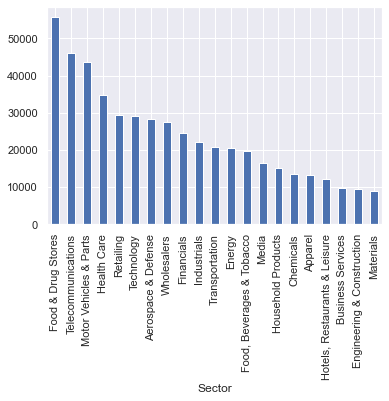

In [211]:
# 2.Count by Sectors' Total revenue
########## Mean of the revenue based on the sector
#Food and Drug Stores has more revenue generation , Materials has lowest 8934.47
F500_data.groupby('Sector')['Revenues'].mean().sort_values(ascending=False).plot.bar()

# 3.Count by Sectors' Total Profit

<AxesSubplot:xlabel='Sector'>

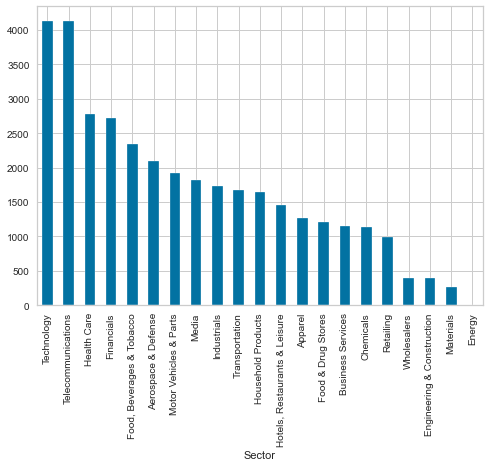

In [318]:
F500_data.groupby("Sector")["Profits"].mean().sort_values(ascending = False).plot.bar()
#Seems like Technology/Telecommunication sector are having getting more profit in the fasial year.

<AxesSubplot:xlabel='Sector'>

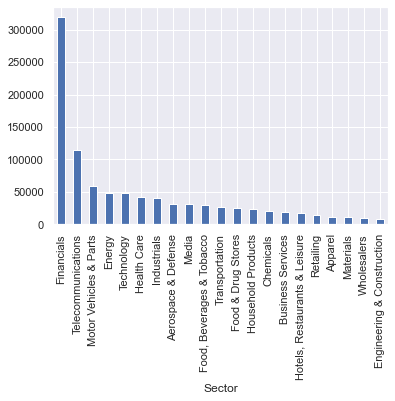

In [213]:
#A current asset definition is a business asset that has a short life span (less than a year) and can be easily 
# converted into cash :- land, property

# 4.Count by Sectors' Total assest
F500_data.groupby('Sector')['Assets'].mean().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='Sector'>

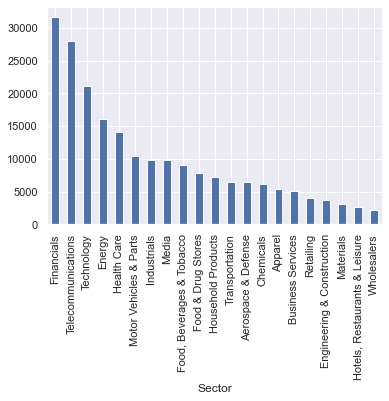

In [214]:
##Financials sector :- more assests. more than 50% than 2nd one Telecommunication.
# 4.Count by Sectors' Total share equity
F500_data.groupby('Sector')['Totshequity'].mean().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='Sector'>

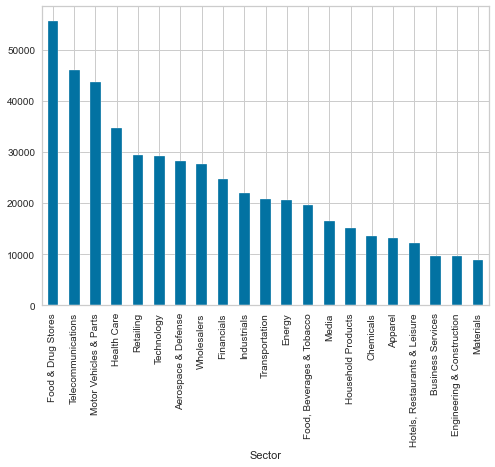

In [317]:
#Finance has high share equity, high assest, profit , revenue, 

F500_data.groupby('Sector')['Revenues'].mean().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='Sector'>

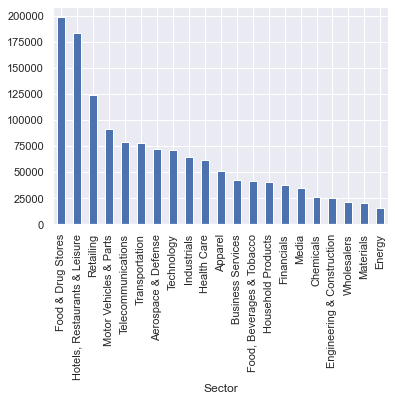

In [218]:
# 4.Count by Sectors' Total Employees

F500_data.groupby('Sector')['Employees'].mean().sort_values(ascending=False).plot.bar()

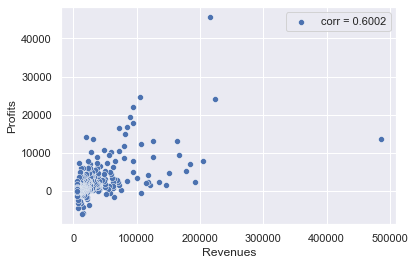

In [219]:
##Revenue and Profit
ax=sns.scatterplot(x=F500_data2['Revenues'],y=F500_data2['Profits'],data=F500_data2,sizes=(10,500),label = "corr = {:.4f}".format(corr))
ax.legend(loc='upper right',bbox_to_anchor=(1,1))

In [220]:

from scipy import stats
corr = stats.pearsonr(x=F500_data2['Revenues'],y=F500_data2['Profits'])[0]
corr

0.6002391877820479

0.32984415628114855

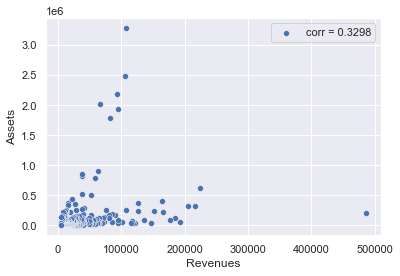

In [224]:
from scipy import stats
corr1 = stats.pearsonr(x=F500_data2['Revenues'],y=F500_data2['Assets'])[0]
corr1

ax=sns.scatterplot(x=F500_data2['Revenues'],y=F500_data2['Assets'],data=F500_data2,sizes=(10,500),label = "corr = {:.4f}".format(corr1))
ax.legend(loc='upper right',bbox_to_anchor=(1,1))
from scipy import stats
stats.pearsonr(x=F500_data2['Revenues'],y=F500_data2['Assets'])[0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-0.4495308683276066, 3.055851763349964e-26)

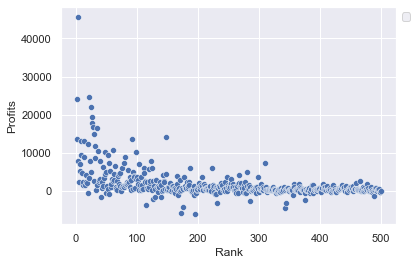

In [228]:
ax=sns.scatterplot(x=F500_data['Rank'],y=F500_data['Profits'],data=F500_data2,sizes=(10,500))
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
from scipy import stats
stats.pearsonr(x=F500_data['Rank'],y=F500_data['Profits'])

# Heat Map 

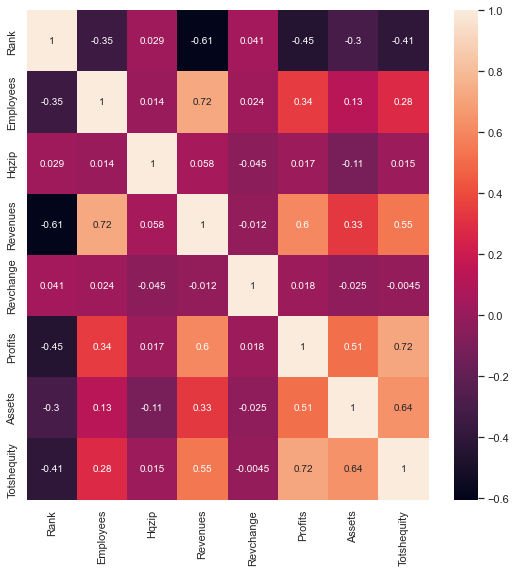

In [225]:
#F500_data
plt.figure(figsize=(9,9))
sns.heatmap(F500_data.corr(), annot=True)
plt.show()   #revenue and employees

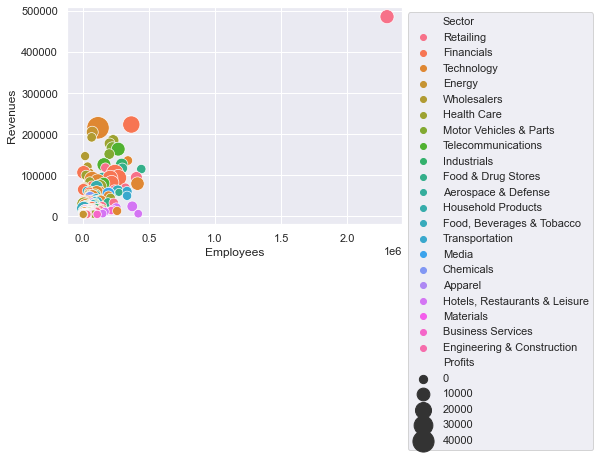

In [226]:
# 5.Scattering by Sectors, Revenue and Employees

## Employees(x axis, Revenue(y axis) and Profit(Size)    hue/basis =Sector
ax=sns.scatterplot(x=F500_data1['Employees'],y=F500_data1['Revenues'],hue=F500_data1['Sector'],size=F500_data1['Profits'],data=F500_data1,sizes=(10,500))
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

In [227]:
# Mapping by State

F500_df.columns

# Mapping by State
df_state=pd.DataFrame(F500_df.groupby('Hqstate')['Hqstate'].count().sort_values(ascending=False))
df_state=df_state.rename(columns={'Hqstate': 'num'})

import plotly.express as px

fig = px.choropleth(locations=df_state.index, locationmode="USA-states", color=df_state['num'], scope="usa")
fig.show()

# 2.3 Feature Engineering 

In [230]:


F500_df
columns_list = ['Website','Hqlocation','Hqaddr','Hqcity','Hqstate','Hqzip','Hqtel','Ceo','Ceo-title','Address','Ticker','Fullname']

F500_df.columns

Index(['Rank', 'Title', 'Website', 'Employees', 'Sector', 'Industry',
       'Hqlocation', 'Hqaddr', 'Hqcity', 'Hqstate', 'Hqzip', 'Hqtel', 'Ceo',
       'Ceo-title', 'Address', 'Ticker', 'Fullname', 'Revenues', 'Revchange',
       'Profits', 'Prftchange', 'Assets', 'Totshequity'],
      dtype='object')

In [231]:
F500_data = F500_df.copy()
F500_data.drop(columns=columns_list,axis=1,inplace=True)
# %%
F500_data.head()
F500_data['Sector'].nunique()
F500_data['Industry'].nunique()
# %%
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Industry'],return_df = True)
data_encoded=encoder.fit_transform(F500_data) 
encoder_1 =ce.OneHotEncoder(cols='Sector',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder_1.fit_transform(data_encoded)

data_encoded
# data_encoded.columns

,Rank,Title,Employees,Sector_Retailing,Sector_Financials,Sector_Technology,Sector_Energy,Sector_Wholesalers,Sector_Health Care,Sector_Motor Vehicles & Parts,...,Industry_3,Industry_4,Industry_5,Industry_6,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,2300000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,367700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,223604,6.1,24074.0,0,620854,283001.0
2,3,Apple,116000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,72700,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,68000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,1,192487,6.2,2258.0,53,56563,8924.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Michaels Cos.,31000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,5197,5.8,378.2,4.2,2148,-1698.0
496,497,Toll Brothers,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,5170,23.9,382.1,5.2,9737,4229.0
497,498,Yahoo,8500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,1,0,5169,4.0,-214.3,5.2,48083,31049.0
498,499,Vistra Energy,4431,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,0,5164,4.0,-214.3,5.2,15167,6597.0


In [233]:
# RANKING CLUSTER:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as mtp 

In [234]:
print(F500_data['Sector'].nunique()) # 21  #upper level (Retail)
F500_data['Industry'].nunique()   #73     #General merchandise(goods)

21


73

In [ ]:

# # High categorical features with high number of categories, 
# 1. Rank , education (phd> masters> high school) ordinal :- LABEL ENCODING
# 2. state name, company (can'r rank them) :-  company based on GDP then we can .. but alone cant
# 3. Dummies varibales
# categorize them whether it is nominal or ordinal  :- top 10 cateogory and then one hot encoding
# If we one hot encoding:- we increase 

# Standard scaler

In [236]:
                        
scaler = StandardScaler()

scaler.fit(data_encoded['Profits'].to_numpy().reshape(1,-1))

col_list = ['Employees','Revenues','Revchange','Profits','Prftchange','Assets','Totshequity']

def conv_to_float(str):
    float_1  = float(str.replace(',',''))
    return float_1

for c_name in col_list:
    print(c_name)
    if data_encoded[c_name].dtype == 'object':
        data_encoded[c_name] = data_encoded[c_name].apply(lambda x:conv_to_float(x))
    
    data = data_encoded[c_name].to_numpy().reshape(-1,1)
    std_data = scaler.fit_transform(data)  
    # data = scaler.transform(data)
    data_encoded[c_name] = std_data   

Employees
Revenues
Revchange
Profits
Prftchange
Assets
Totshequity


# KMEANS ############################################

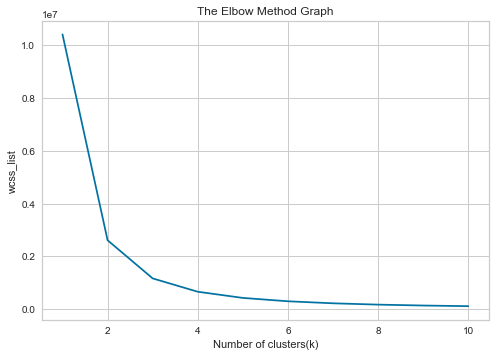

In [379]:
##################################################KMEANS ############################################ BIASED
# type(data_encoded.columns)
# data_encoded = data_encoded.drop('Title',axis=1)
# data_encoded = data_encoded.drop('Rank',axis=1)
x = (data_encoded.iloc[:,:]).values
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

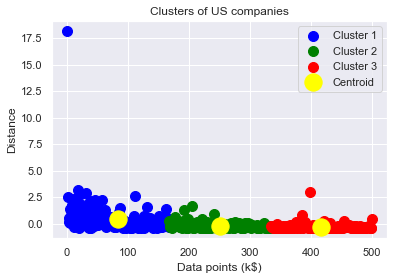

In [238]:
###################################################KMEANS ############################################
%matplotlib inline
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict_Kmeans= kmeans.fit_predict(x)  
# %%
#visulaizing the clusters  
mtp.scatter(x[y_predict_Kmeans == 0, 0], x[y_predict_Kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict_Kmeans == 1, 0], x[y_predict_Kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict_Kmeans== 2, 0], x[y_predict_Kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of US companies')  
mtp.xlabel('Data points (k$)')  
mtp.ylabel('Distance')  
mtp.legend()  
mtp.show()

In [239]:
##################################################KMEANS ############################################
# Y_predict_kmeans
pca_df_kmeans= pd.concat([data_encoded,pd.DataFrame({'cluster':kmeans.labels_})],axis=1)
pca_df_kmeans   #added column cluster      

,Rank,Employees,Sector_Retailing,Sector_Financials,Sector_Technology,Sector_Energy,Sector_Wholesalers,Sector_Health Care,Sector_Motor Vehicles & Parts,Sector_Telecommunications,...,Industry_4,Industry_5,Industry_6,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,cluster
0,1,18.192467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,12.056745,-0.148289,3.015930,-0.052097,0.438399,2.104046,0
1,2,2.524557,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,5.208811,0.117408,5.667686,-0.040993,2.000571,8.833642,0
2,3,0.483666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,5.000843,-0.574408,11.162118,-0.063202,0.893178,3.758577,0
3,4,0.132572,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,4.723159,-1.025592,1.540698,-0.120421,0.925115,5.040068,0
4,5,0.094462,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,4.396336,0.122421,0.121649,0.040749,-0.088195,-0.154665,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,-0.205550,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,-0.493871,0.102369,-0.356232,-0.034515,-0.289616,-0.503012,2
496,497,-0.422855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,-0.494576,1.009750,-0.355240,-0.032973,-0.261525,-0.308637,2
497,498,-0.387989,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,-0.494602,0.012132,-0.506856,-0.032973,-0.119584,0.570920,2
498,499,-0.420982,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,-0.494732,0.012132,-0.506856,-0.032973,-0.241426,-0.230979,2


# biased result K Means

In [240]:
y_predict_Kmeans   

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

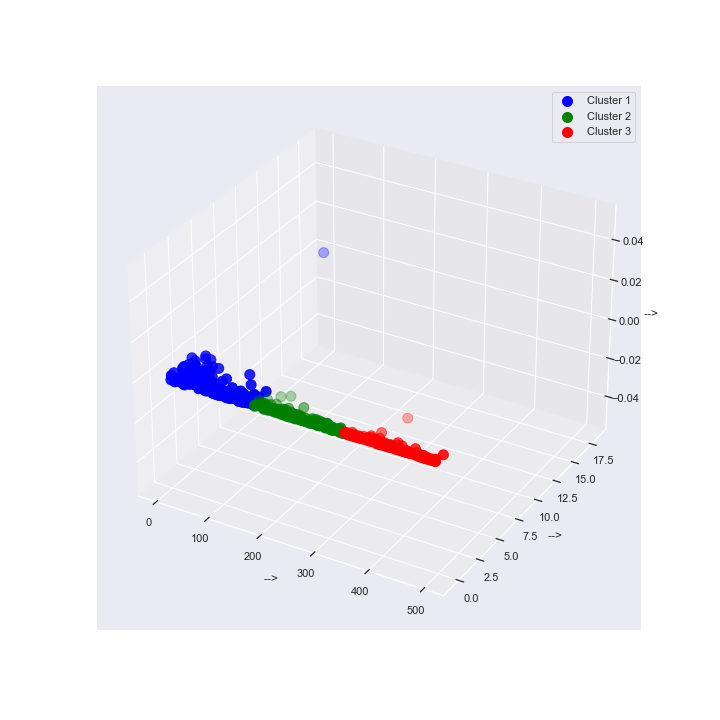

In [241]:
##################################################KMEANS ############################################  3D
#3d visulaization of clusters  (KMEANS)
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_predict_Kmeans == 0, 0], x[y_predict_Kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
ax.scatter(x[y_predict_Kmeans == 1, 0], x[y_predict_Kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
ax.scatter(x[y_predict_Kmeans== 2, 0], x[y_predict_Kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
ax.set_xlabel('-->')
ax.set_ylabel('-->')
ax.set_zlabel('-->')
ax.legend()
plt.show()

# ##KMODE cluster 3

In [285]:
# ##################################################KMODE ############################################   cluster 3
# Kmode clustering [ For categorical data]
import numpy as np
from kmodes.kmodes import KModes
km = KModes(n_clusters=3, init='Cao', n_init=1, verbose=1)
y_predict_KMODE_cl3 = km.fit_predict(x)
# %%
# print(km.cluster_centroids_)
# print(km.labels_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20, cost: 5410.0
Run 1, iteration: 2/100, moves: 0, cost: 5410.0


In [280]:
# ##################################################KMODE ############################################ cluster 2
# Kmode clustering [ For categorical data]
import numpy as np
from kmodes.kmodes import KModes
km = KModes(n_clusters=2, init='Huang', n_init=50, verbose=1)
y_predict_KMODE_cl2 = km.fit_predict(x)
# %%
# print(km.cluster_centroids_)
# print(km.labels_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 145, cost: 5495.0
Run 1, iteration: 2/100, moves: 5, cost: 5495.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 126, cost: 5521.0
Run 2, iteration: 2/100, moves: 84, cost: 5447.0
Run 2, iteration: 3/100, moves: 2, cost: 5447.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 85, cost: 5498.0
Run 3, iteration: 2/100, moves: 0, cost: 5498.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 126, cost: 5462.0
Run 4, iteration: 2/100, moves: 0, cost: 5462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 89, cost: 5456.0
Run 5, iteration: 2/100, moves: 0, cost: 5456.0
Init: initializing centroids
Init: initializing clusters
Starti

Init: initializing clusters
Starting iterations...
Run 47, iteration: 1/100, moves: 89, cost: 5457.0
Run 47, iteration: 2/100, moves: 44, cost: 5455.0
Run 47, iteration: 3/100, moves: 0, cost: 5455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 48, iteration: 1/100, moves: 95, cost: 5428.0
Run 48, iteration: 2/100, moves: 0, cost: 5428.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 49, iteration: 1/100, moves: 101, cost: 5448.0
Run 49, iteration: 2/100, moves: 0, cost: 5448.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 50, iteration: 1/100, moves: 12, cost: 5477.0
Run 50, iteration: 2/100, moves: 62, cost: 5476.0
Run 50, iteration: 3/100, moves: 0, cost: 5476.0
Best run was number 48


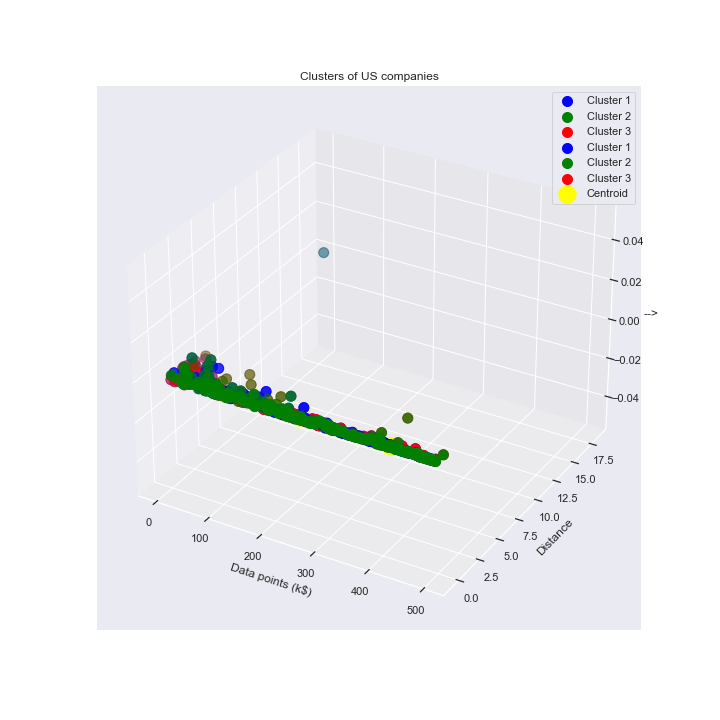

In [255]:
##################################################KMODE ############################################ CLUSTER - 3
#visulaizing the clusters  
mtp.scatter(x[y_predict_KMODE_cl3 == 0, 0], x[y_predict_KMODE_cl3 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict_KMODE_cl3 == 1, 0], x[y_predict_KMODE_cl3 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict_KMODE_cl3== 2, 0], x[y_predict_KMODE_cl3 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
# mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
# mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of US companies')  
mtp.xlabel('Data points (k$)')  
mtp.ylabel('Distance')  
mtp.legend()  
mtp.show() 

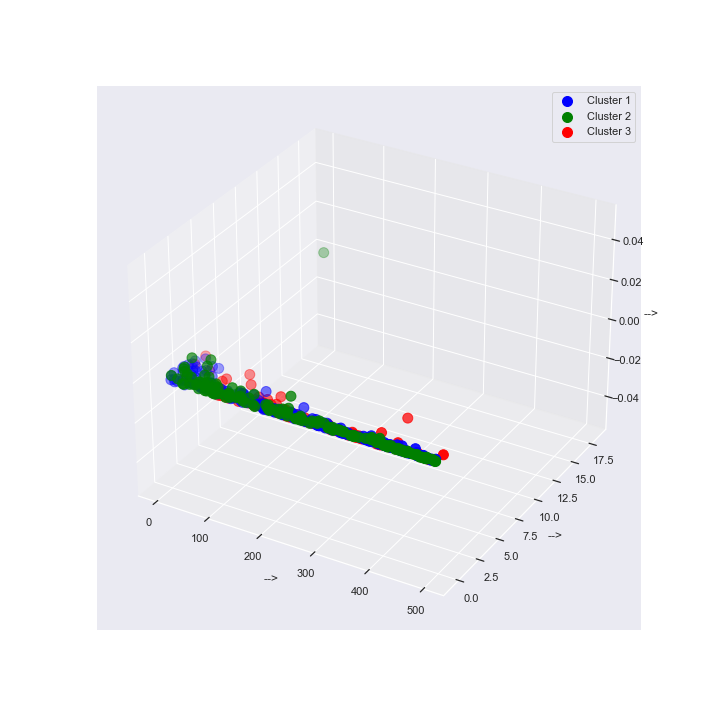

In [256]:


# %%
# 3d visualisation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_predict_KMODE == 0, 0], x[y_predict_KMODE == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
ax.scatter(x[y_predict_KMODE == 1, 0], x[y_predict_KMODE == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
ax.scatter(x[y_predict_KMODE== 2, 0], x[y_predict_KMODE == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
ax.set_xlabel('-->')
ax.set_ylabel('-->')
ax.set_zlabel('-->')
ax.legend()
plt.show()

In [246]:
x

array([[ 1.00000000e+00,  1.81924668e+01,  1.00000000e+00, ...,
        -5.20972819e-02,  4.38398692e-01,  2.10404559e+00],
       [ 2.00000000e+00,  2.52455708e+00,  0.00000000e+00, ...,
        -4.09928025e-02,  2.00057145e+00,  8.83364217e+00],
       [ 3.00000000e+00,  4.83666485e-01,  0.00000000e+00, ...,
        -6.32017613e-02,  8.93178120e-01,  3.75857733e+00],
       ...,
       [ 4.98000000e+02, -3.87989210e-01,  0.00000000e+00, ...,
        -3.29729008e-02, -1.19584399e-01,  5.70920296e-01],
       [ 4.99000000e+02, -4.20982392e-01,  0.00000000e+00, ...,
        -3.29729008e-02, -2.41425501e-01, -2.30978777e-01],
       [ 5.00000000e+02,  4.35015935e-01,  0.00000000e+00, ...,
        -7.95500226e-02, -2.89124020e-01, -4.15384081e-01]])

In [245]:
y_predict_KMODE

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0,
       2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1,
       1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0,
       0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2,

In [261]:
y_predict_KMODE_cl2

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,

# y_predict_KMODE_cl3

In [262]:
y_predict_KMODE_cl3

array([1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 2, 1,
       0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0,
       1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0,

In [258]:
silhouette_score(x,y_predict_Kmeans)  #cluster 3  KMeans

0.5861315776596021

#  KMEANS 2,3,4,5  #score is good but biased

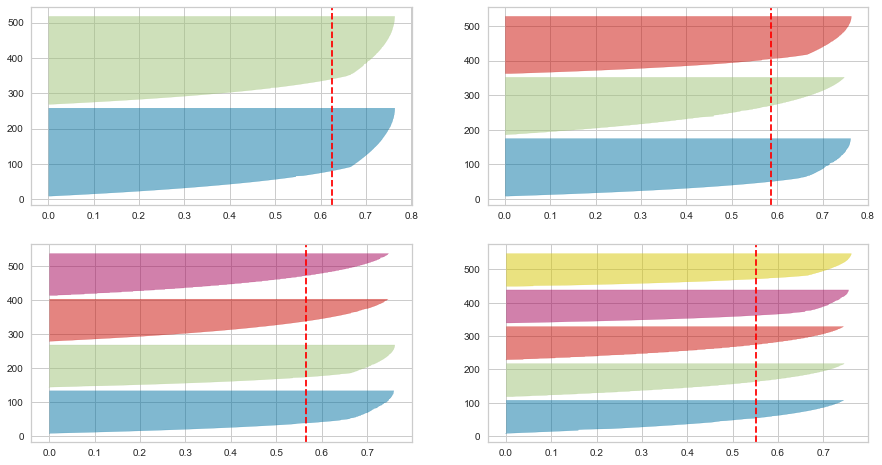

In [273]:
### KMEANS 2,3,4,5  #score is good but biased
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)    

# Elbow curve to find optimal KMODE

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5841.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 5841.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 5841.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 5841.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5841.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 110, cost: 5463.0
Run 1, iteration: 2/100, moves: 35, cost: 5463.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10, cost: 5502.0
Run 2, iteration: 2/100, moves

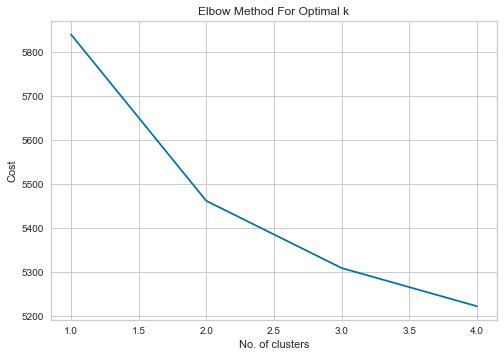

In [282]:
# Elbow curve to find optimal KMODE
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(x)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [287]:
data_encoded

,Rank,Employees,Sector_Retailing,Sector_Financials,Sector_Technology,Sector_Energy,Sector_Wholesalers,Sector_Health Care,Sector_Motor Vehicles & Parts,Sector_Telecommunications,...,Industry_3,Industry_4,Industry_5,Industry_6,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,18.192467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,12.056745,-0.148289,3.015930,-0.052097,0.438399,2.104046
1,2,2.524557,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,5.208811,0.117408,5.667686,-0.040993,2.000571,8.833642
2,3,0.483666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,5.000843,-0.574408,11.162118,-0.063202,0.893178,3.758577
3,4,0.132572,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,4.723159,-1.025592,1.540698,-0.120421,0.925115,5.040068
4,5,0.094462,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,1,4.396336,0.122421,0.121649,0.040749,-0.088195,-0.154665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,-0.205550,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,-0.493871,0.102369,-0.356232,-0.034515,-0.289616,-0.503012
496,497,-0.422855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,-0.494576,1.009750,-0.355240,-0.032973,-0.261525,-0.308637
497,498,-0.387989,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,-0.494602,0.012132,-0.506856,-0.032973,-0.119584,0.570920
498,499,-0.420982,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,1,0,-0.494732,0.012132,-0.506856,-0.032973,-0.241426,-0.230979


In [313]:

#### let me try with PCA for kmode

pca = PCA(n_components=2)
x_principal = pca.fit_transform(data_encoded)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

           V1         V2
0  249.597959  11.295496
1  248.561398   9.765017
2  247.556075   8.532747
3  246.528347   4.094915
4  245.505147   0.054990


In [314]:
# Kmode clustering [ For categorical data]
import numpy as np
from kmodes.kmodes import KModes
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
y_predict_KMODE_cl2 = km.fit_predict(x_principal)
# %%
# print(km.cluster_centroids_)
# print(km.labels_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 996.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 996.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 996.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 996.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 996.0
Best run was number 1


In [320]:
clustersDf = pd.DataFrame(y_predict_KMODE_cl3)
clustersDf
clustersDf.columns = ['cluster_predicted']
clustersDf.columns

Index(['cluster_predicted'], dtype='object')

In [321]:
F500_data_cluster_combined = F500_df.copy()
F500_data_cluster_combined.columns

Index(['Rank', 'Title', 'Website', 'Employees', 'Sector', 'Industry',
       'Hqlocation', 'Hqaddr', 'Hqcity', 'Hqstate', 'Hqzip', 'Hqtel', 'Ceo',
       'Ceo-title', 'Address', 'Ticker', 'Fullname', 'Revenues', 'Revchange',
       'Profits', 'Prftchange', 'Assets', 'Totshequity'],
      dtype='object')

In [414]:
combinedDf = pd.concat([F500_data_cluster_combined, clustersDf], axis = 1)
combinedDf.head(5)

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,cluster_predicted
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0,1
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0,0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0,0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0,0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0,0


# Cluster Identification

In [409]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [326]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 1 to 499
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               347 non-null    int64  
 1   Title              347 non-null    object 
 2   Website            347 non-null    object 
 3   Employees          347 non-null    int64  
 4   Sector             347 non-null    object 
 5   Industry           347 non-null    object 
 6   Hqlocation         347 non-null    object 
 7   Hqaddr             347 non-null    object 
 8   Hqcity             347 non-null    object 
 9   Hqstate            347 non-null    object 
 10  Hqzip              347 non-null    int64  
 11  Hqtel              347 non-null    object 
 12  Ceo                347 non-null    object 
 13  Ceo-title          347 non-null    object 
 14  Address            347 non-null    object 
 15  Ticker             347 non-null    object 
 16  Fullname           347 non

In [327]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 493
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               127 non-null    int64  
 1   Title              127 non-null    object 
 2   Website            127 non-null    object 
 3   Employees          127 non-null    int64  
 4   Sector             127 non-null    object 
 5   Industry           127 non-null    object 
 6   Hqlocation         127 non-null    object 
 7   Hqaddr             127 non-null    object 
 8   Hqcity             127 non-null    object 
 9   Hqstate            127 non-null    object 
 10  Hqzip              127 non-null    int64  
 11  Hqtel              127 non-null    object 
 12  Ceo                127 non-null    object 
 13  Ceo-title          127 non-null    object 
 14  Address            127 non-null    object 
 15  Ticker             127 non-null    object 
 16  Fullname           127 non

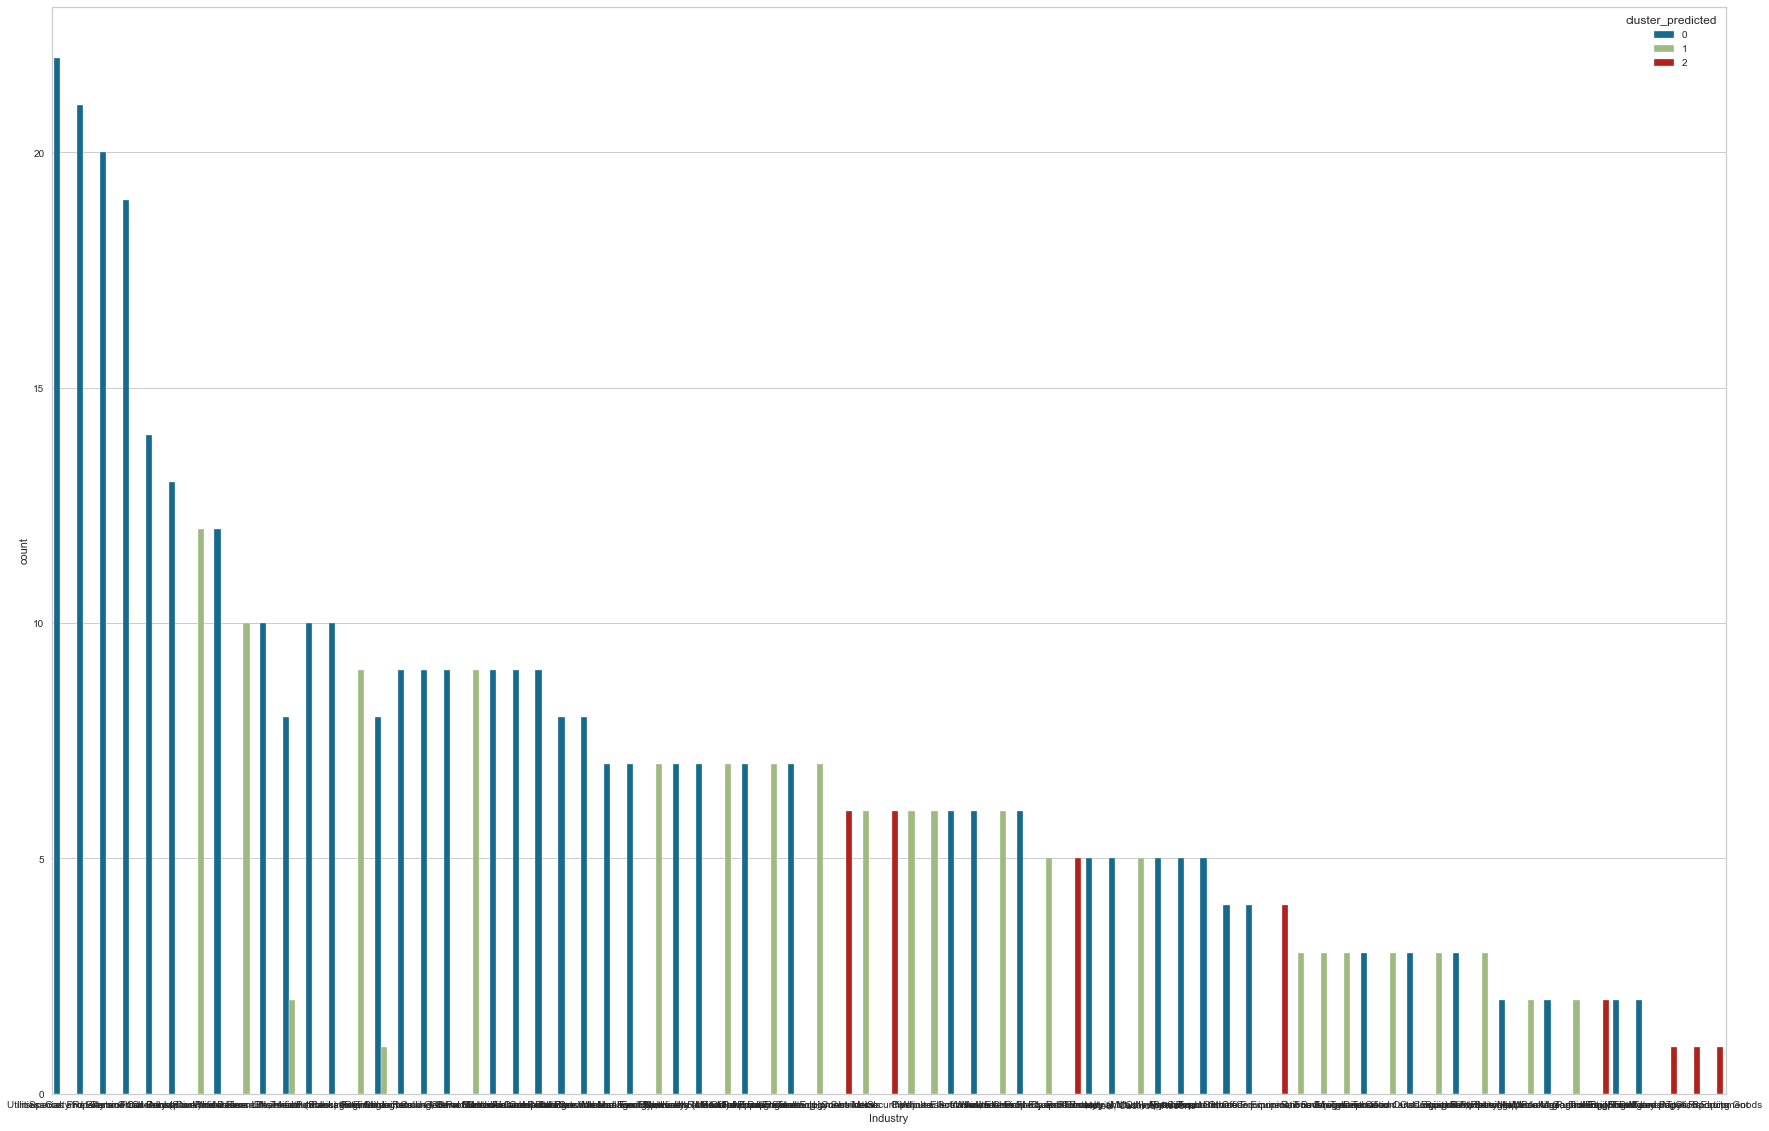

In [415]:
# Job
plt.subplots(figsize = (30,20))
sns.countplot(x=combinedDf['Industry'],order=combinedDf['Industry'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [337]:
col = combinedDf.columns

# Beyond silhoutte 
# Classification supervised

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


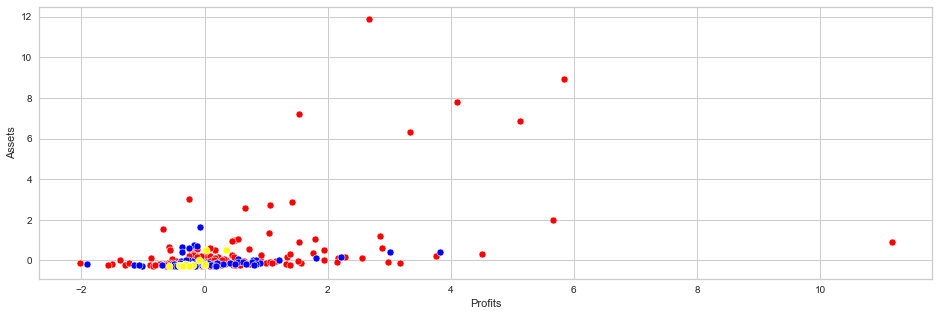

In [435]:
ax=sns.scatterplot(x=cluster_0['Profits'],y=cluster_0['Assets'],data=F500_data2,sizes=(10,500), color = "red")
ax=sns.scatterplot(x=cluster_1['Profits'],y=cluster_1['Assets'],data=F500_data2,sizes=(10,500), color = "blue")
ax=sns.scatterplot(x=cluster_2['Profits'],y=cluster_2['Assets'],data=F500_data2,sizes=(10,500), color = "yellow")
ax.legend(loc='upper right',bbox_to_anchor=(1,1))

In [ ]:
# Revenue vs 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


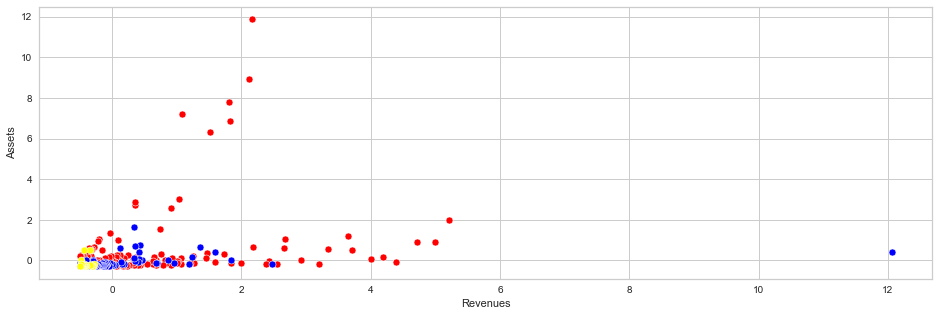

In [434]:
ax=sns.scatterplot(x=cluster_0['Revenues'],y=cluster_0['Assets'],data=F500_data2,sizes=(10,500), color = "red")
ax=sns.scatterplot(x=cluster_1['Revenues'],y=cluster_1['Assets'],data=F500_data2,sizes=(10,500), color = "blue")
ax=sns.scatterplot(x=cluster_2['Revenues'],y=cluster_2['Assets'],data=F500_data2,sizes=(10,500), color = "yellow")
ax.legend(loc='upper right',bbox_to_anchor=(1,1))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


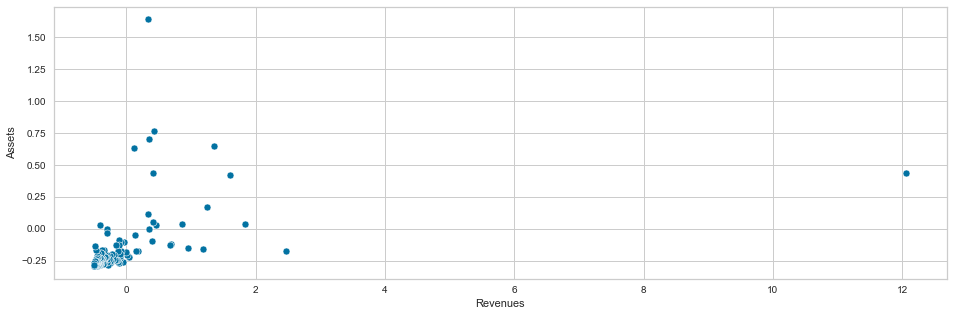

In [431]:
ax=sns.scatterplot(x=cluster_1['Revenues'],y=cluster_1['Assets'],data=F500_data2,sizes=(10,500))
ax.legend(loc='upper right',bbox_to_anchor=(1,1))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


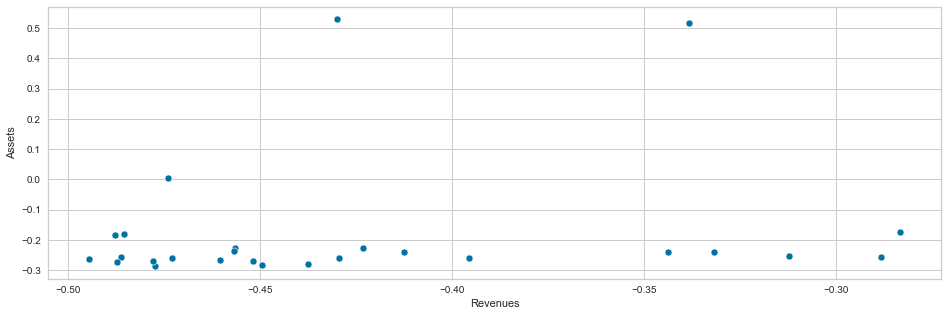

In [429]:
ax=sns.scatterplot(x=cluster_2['Revenues'],y=cluster_2['Assets'],data=F500_data2,sizes=(10,500))
ax.legend(loc='upper right',bbox_to_anchor=(1,1))

In [427]:
import plotly.express as px
fig = px.scatter_3d(combinedDf, x='Revenues', y='Assets', z='Employees', color='cluster_predicted', opacity=0.75)
fig.show()

In [381]:
combinedDf.to_csv(r"D:\UOE MODULES PYTHON DIRECTORy_codes\LFD\Assignment\exports\combineddf.csv")

In [ ]:
for name, values in df[['Company','Cluster']].groupby('Cluster'):
    v=', '.join(values.Company.tolist())
    print(f'Cluster: {name}: {v}')
    print()

In [385]:
F500_data
y =F500_data[["Rank","Title"]]
y.head()

,Rank,Title
0,1,Walmart
1,2,Berkshire Hathaway
2,3,Apple
3,4,Exxon Mobil
4,5,McKesson


In [389]:
x = pd.merge(combinedDf,y,
                 on='Rank',how = "left")
x.head()

,Rank,Employees,Sector_Retailing,Sector_Financials,Sector_Technology,Sector_Energy,Sector_Wholesalers,Sector_Health Care,Sector_Motor Vehicles & Parts,Sector_Telecommunications,...,Industry_5,Industry_6,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,cluster_predicted,Title
0,1,18.192467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,12.056745,-0.148289,3.015930,-0.052097,0.438399,2.104046,1,Walmart
1,2,2.524557,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,5.208811,0.117408,5.667686,-0.040993,2.000571,8.833642,0,Berkshire Hathaway
2,3,0.483666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,5.000843,-0.574408,11.162118,-0.063202,0.893178,3.758577,0,Apple
3,4,0.132572,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,4.723159,-1.025592,1.540698,-0.120421,0.925115,5.040068,0,Exxon Mobil
4,5,0.094462,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,4.396336,0.122421,0.121649,0.040749,-0.088195,-0.154665,0,McKesson


In [392]:
for name, values in x[['Title','cluster_predicted']].groupby('cluster_predicted'):
    v=', '.join(values.Title.tolist())
    print(f'Cluster: {name}: {v}')
    print()

Cluster: 0: Berkshire Hathaway, Apple, Exxon Mobil, McKesson, UnitedHealth Group, CVS Health, General Motors, AT&T, Ford Motor, AmerisourceBergen, Amazon.com, General Electric, Verizon, Cardinal Health, Walgreens Boots Alliance, Kroger, Chevron, Fannie Mae, J.P. Morgan Chase, Express Scripts Holding, Home Depot, Wells Fargo, Bank of America Corp., Alphabet, Anthem, Citigroup, Comcast, IBM, Phillips 66, Johnson & Johnson, Valero Energy, Freddie Mac, Lowe’s, Dell Technologies, MetLife, Aetna, PepsiCo, Archer Daniels Midland, Intel, Prudential Financial, Albertsons Cos., Marathon Petroleum, Disney, Humana, Pfizer, AIG, Sysco, Hewlett Packard Enterprise, Cisco Systems, HP, Dow Chemical, HCA Holdings, Centene, American Airlines Group, Cigna, Delta Air Lines, Best Buy, Caterpillar, Liberty Mutual Insurance Group, Morgan Stanley, Goldman Sachs Group, Tyson Foods, United Continental Holdings, Allstate, Publix Super Markets, American Express, TJX, Nike, Exelon, Rite Aid, Gilead Sciences, CHS, C

# Hierarichal clustering

In [ ]:
# Hierarichal clustering
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

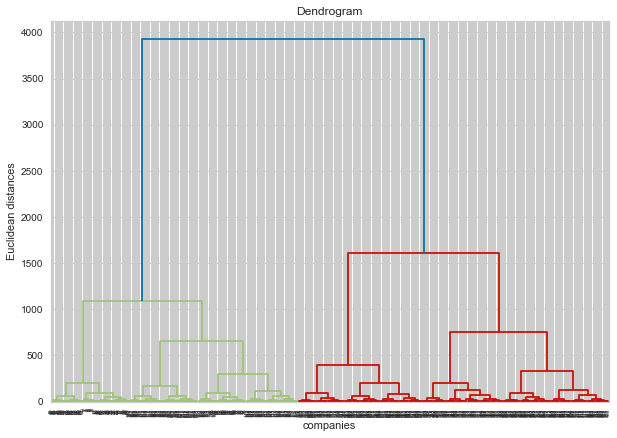

In [404]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))


dendrogram = sch.dendrogram(sch.linkage(data_encoded , method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('companies')
plt.ylabel('Euclidean distances')
plt.show()

#check for largest distance vertically without crossing any horizontal line

In [436]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_encoded)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [395]:
cl = cluster.fit_predict(data_encoded)

In [396]:
from sklearn.metrics import silhouette_score

In [397]:
silhouette_score(data_encoded,cl)

0.6166356046433084

In [398]:
X = data_encoded.values

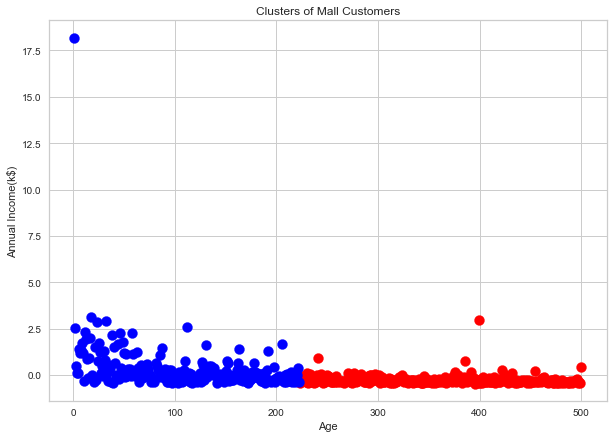

In [399]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[cl==0, 0], X[cl==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[cl==1, 0], X[cl==1, 1], s=100, c='blue', label ='Cluster 2')
plt.title('Clusters of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
plt.show()

In [ ]:
X1 = data_encoded.values

In [25]:
print(F500_df1.shape)
F500_df1.describe()           # use .describe() to generate some summary statistics. 
                               # Generating summary statistics is a quick way to help us determine whether 
                               # or not the dataset has outliers. 

(500, 10)


,Employees,Revenues,Revchange,Profits,Assets,Totshequity
count,5.000000e+02,500.000000,500.00000,500.000000,5.000000e+02,500.0000
mean,5.635013e+04,24111.748000,3.75800,1779.479800,8.038934e+04,13640.1470
std,1.234520e+05,38337.353337,19.96748,3937.558721,2.704257e+05,30523.1538
min,8.300000e+01,5145.000000,-57.50000,-6177.000000,4.370000e+02,-12688.0000
25%,1.190000e+04,7245.000000,-3.82500,235.725000,8.436500e+03,1997.5000
50%,2.500000e+04,11384.000000,1.90000,683.600000,1.932450e+04,4981.0000
75%,5.682525e+04,22605.250000,7.32500,1770.775000,4.812600e+04,12467.7500
max,2.300000e+06,485873.000000,197.30000,45687.000000,3.287968e+06,283001.0000


# for outliers :- 1) create a histogram

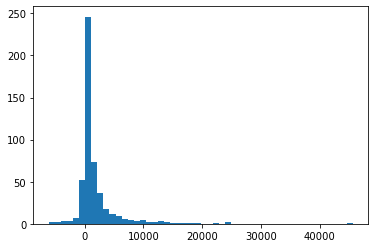

In [19]:
import matplotlib.pyplot as plt
plt.hist(F500_df1["Profits"], bins = 50)

plt.show()

#Notice the data does not follow a normal distribution. 
#Since the data is skewed,  :- Right Skewed
#instead of using a z-score we can use interquartile range (IQR) to determine the outliers.

#We will explore using IQR after reviewing the other visualization techniques.

# Dist. of Revenue, Profit, Total  share equity  And  Assets.

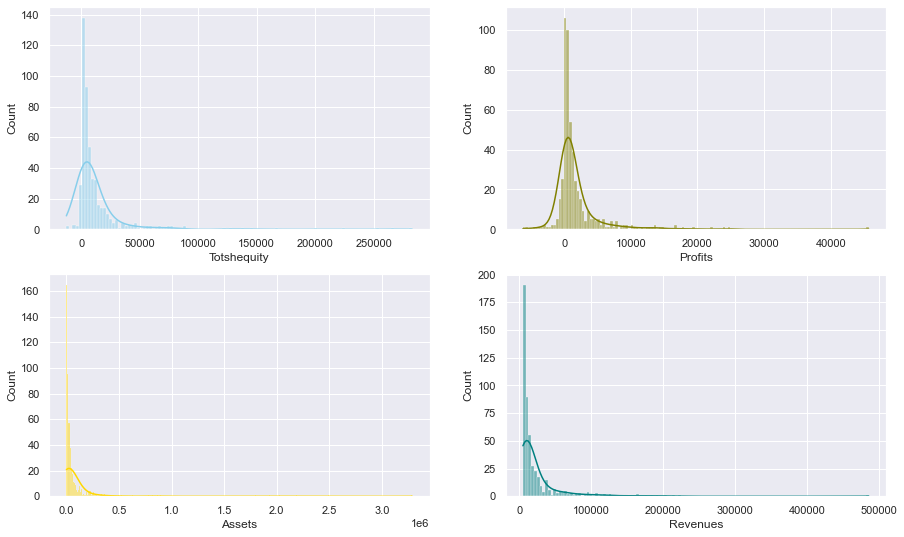

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 9))

sns.histplot(data=F500_df1, x="Totshequity", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=F500_df1, x="Profits", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=F500_df1, x="Assets", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=F500_df1, x="Revenues", kde=True, color="teal", ax=axs[1, 1])

# sns.histplot(data=F500_df1, x="Prftchange", kde=True, color="teal", ax=axs[1, 0])
# sns.histplot(data=F500_df1, x="Assets", kde=True, color="teal", ax=axs[1, 1])

plt.show()


In [333]:
F500_df1.head()

,Title,Employees,Sector,Industry,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,Walmart,2300000,Retailing,General Merchandisers,485873,0.8,13643.0,-7.2,198825,77798.0
1,Berkshire Hathaway,367700,Financials,Insurance: Property and Casualty (Stock),223604,6.1,24074.0,0,620854,283001.0
2,Apple,116000,Technology,"Computers, Office Equipment",215639,-7.7,45687.0,-14.4,321686,128249.0
3,Exxon Mobil,72700,Energy,Petroleum Refining,205004,-16.7,7840.0,-51.5,330314,167325.0
4,McKesson,68000,Wholesalers,Wholesalers: Health Care,192487,6.2,2258.0,53,56563,8924.0


In [300]:
F500_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        500 non-null    object 
 1   Employees    500 non-null    int64  
 2   Sector       500 non-null    object 
 3   Industry     500 non-null    object 
 4   Revenues     500 non-null    int64  
 5   Revchange    500 non-null    float64
 6   Profits      500 non-null    float64
 7   Prftchange   500 non-null    object 
 8   Assets       500 non-null    int64  
 9   Totshequity  500 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 39.2+ KB


In [336]:
for c_name in col_list:
    print(c_name)
    if F500_df1[c_name].dtype == 'object':
        F500_df1[c_name] = F500_df1[c_name].apply(lambda x:conv_to_float(x))
        F500_df1[c_name] = F500_df1[c_name].apply(lambda x:np.log(x))
    else:
        F500_df1[c_name] = F500_df1[c_name].apply(lambda x:np.log(x))

F500_df1.head(5)

Employees
Revenues
Revchange
Profits
Prftchange
Assets
Totshequity


,Title,Employees,Sector,Industry,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,Walmart,14.648420,Retailing,General Merchandisers,13.093703,-0.223144,9.520982,NaN,12.200180,11.261871
1,Berkshire Hathaway,12.815023,Financials,Insurance: Property and Casualty (Stock),12.317632,1.808289,10.088888,-inf,13.338851,12.553206
2,Apple,11.661345,Technology,"Computers, Office Equipment",12.281361,NaN,10.729569,NaN,12.681331,11.761729
3,Exxon Mobil,11.194097,Energy,Petroleum Refining,12.230785,NaN,8.966994,NaN,12.707799,12.027693
4,McKesson,11.127263,Wholesalers,Wholesalers: Health Care,12.167784,1.824549,7.722235,3.970292,10.943110,9.096500


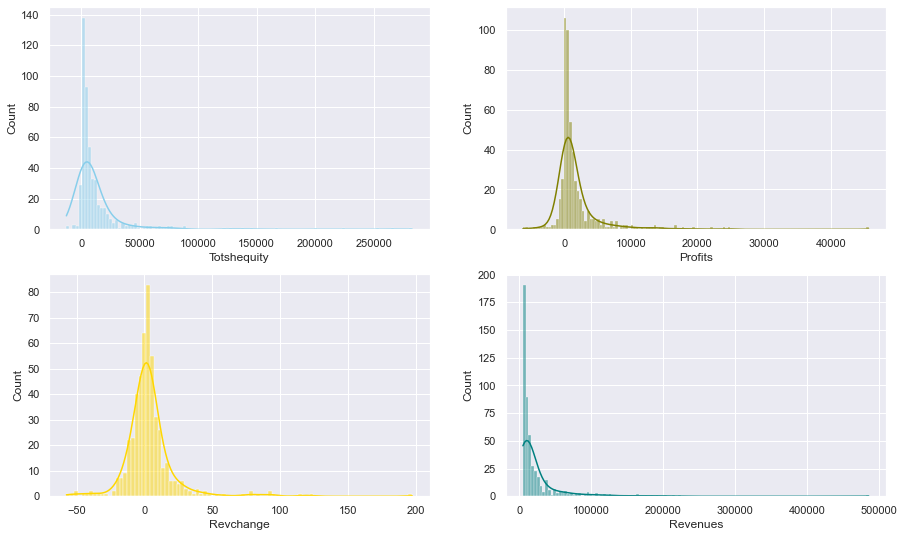

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 9))

sns.histplot(data=F500_df1, x="Totshequity", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=F500_df1, x="Profits", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=F500_df1, x="Revchange", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=F500_df1, x="Revenues", kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [96]:
F500_df2 = F500_df1.copy()

In [97]:
F500_df2["Totshequity"]=(F500_df2["Totshequity"]-F500_df2["Totshequity"].mean())/F500_df2["Totshequity"].std()

In [98]:
F500_df2.head(5)

,Title,Employees,Sector,Industry,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,Walmart,2300000,Retailing,General Merchandisers,485873,0.8,13643.0,-7.2,198825,2.101940
1,Berkshire Hathaway,367700,Financials,Insurance: Property and Casualty (Stock),223604,6.1,24074.0,0,620854,8.824804
2,Apple,116000,Technology,"Computers, Office Equipment",215639,-7.7,45687.0,-14.4,321686,3.754817
3,Exxon Mobil,72700,Energy,Petroleum Refining,205004,-16.7,7840.0,-51.5,330314,5.035025
4,McKesson,68000,Wholesalers,Wholesalers: Health Care,192487,6.2,2258.0,53,56563,-0.154510


In [99]:
F500_df2["Profits"]=(F500_df2["Profits"]-F500_df2["Profits"].mean())/F500_df2["Profits"].std()

In [101]:
F500_df2["Revenues"]=(F500_df2["Revenues"]-F500_df2["Revenues"].mean())/F500_df2["Revenues"].std()

In [102]:
F500_df2["Assets"]=(F500_df2["Assets"]-F500_df2["Assets"].mean())/F500_df2["Assets"].std()

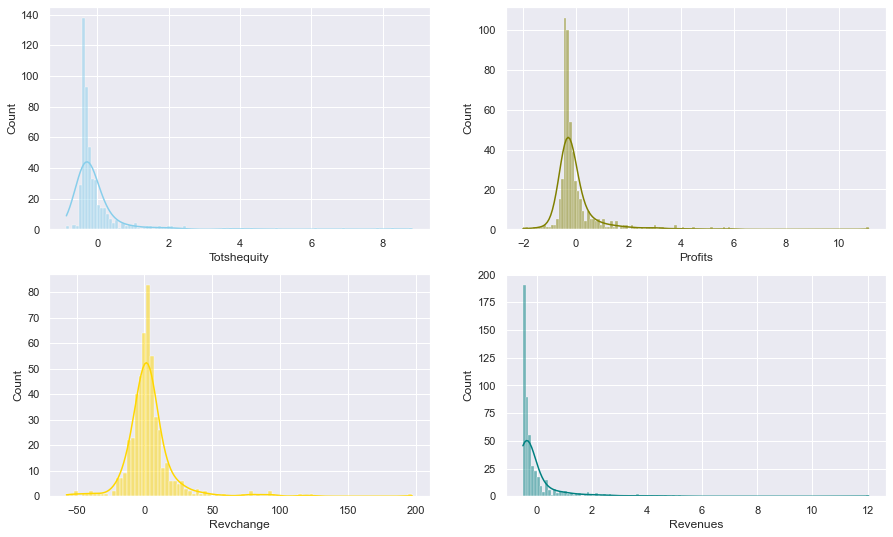

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 9))

sns.histplot(data=F500_df2, x="Totshequity", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=F500_df2, x="Profits", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=F500_df2, x="Revchange", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=F500_df2, x="Revenues", kde=True, color="teal", ax=axs[1, 1])

plt.show()

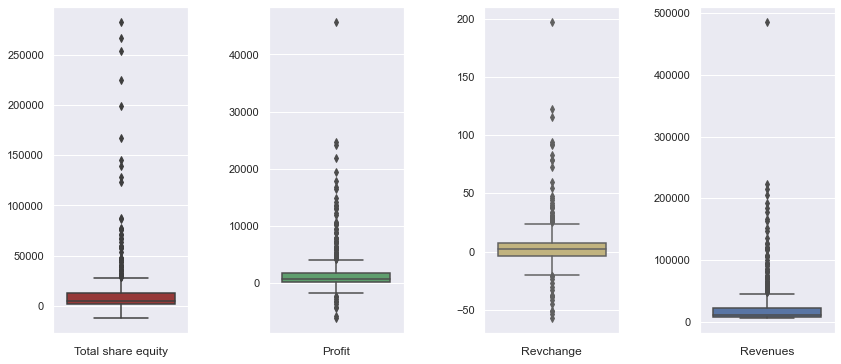

In [23]:


# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(14, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.6) 

# draw boxplot for Total share equity in the 1st subplot
sns.boxplot(data=F500_df1['Totshequity'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Total share equity')

# draw boxplot for Profits in the 2nd subplot
sns.boxplot(data=F500_df1['Profits'], ax=ax[1], color='g')
ax[1].set_xlabel('Profit')

# draw boxplot for Revchange in the 3rd subplot
sns.boxplot(data=F500_df1['Revchange'], ax=ax[2], color='y')
ax[2].set_xlabel('Revchange')

# finally draw boxplot for Revenues in the 4th subplot
sns.boxplot(data=F500_df1['Revenues'], ax=ax[3])
ax[3].set_xlabel('Revenues')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

#As we can see, there are a lot of outliers. 
# That thick line near 0 is the box part of our box plot. 
# Above the box and upper fence are some points showing outliers.


In [24]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

# Notice using .quantile() we can define Q1 and Q3. 
# Next we calculate IQR, then we use the values to find the outliers in the dataframe. 
# Since it takes a dataframe, we can input one or multiple columns at a time. 

# First run fare_amount through the function to return a series of the outliers.

#1.Totshequity
outliers_Totshequity = find_outliers_IQR(F500_df1['Totshequity'])
print("number of outliers:"  + str(len(outliers_Totshequity)))
print("max outlier value: " + str(outliers_Totshequity.max()))
print(" min outlier value:" + str(outliers_Totshequity.min()))
outliers_Totshequity

number of outliers:52
max outlier value: 283001.0
 min outlier value:28840.0


0       77798.0
1      283001.0
2      128249.0
3      167325.0
5       38274.0
6       36830.0
7       43836.0
8      123135.0
9       29170.0
12      75828.0
16      29880.0
18     145556.0
20     254190.0
24     199581.0
25     266840.0
26     139036.0
27      71997.0
29     225120.0
30      53943.0
32      87592.0
34      70418.0
35      57341.0
41      67309.0
46      66226.0
47      45863.0
51      43265.0
53      59544.0
54      76300.0
58      31448.0
59      63586.0
68      40088.0
75      76050.0
77      86893.0
79      35583.0
80      47289.0
95      40139.0
97      59194.0
99      47514.0
101     28840.0
105     57358.0
114     34974.0
118     31778.0
120     41033.0
122     29875.0
124     47298.0
165     45699.0
176     38811.0
186     32912.0
214     34431.0
244     29881.0
254     29098.0
497     31049.0
Name: Totshequity, dtype: float64

In [39]:
F500_data1 = F500_df1.copy()

In [32]:
# After calculating the upper and lower limit, we use the numpy .where() function to apply the limits to fare_amount. 

F500_data1["Revenues1"] = np.where(F500_data1["Revenues"] > upper_limit_revenue, upper_limit_revenue,np.where(F500_data1["Revenues"] < lower_limit_revenue, lower_limit_revenue,F500_data1["Revenues"]))
F500_data1["Revchange1"] = np.where(F500_data1["Revchange"] > upper_limit_revchange, upper_limit_revchange,np.where(F500_data1["Revchange"] < lower_limit_revchange, lower_limit_revchange,F500_data1["Revchange"]))
F500_data1["Profits1"] = np.where(F500_data1["Profits"] > upper_limit_Profits, upper_limit_Profits,np.where(F500_data1["Profits"] < lower_limit_Profits, lower_limit_Profits,F500_data1["Profits"]))
F500_data1["Totshequity1"] = np.where(F500_data1["Totshequity"] > upper_limit_Totshequity, upper_limit_Totshequity,np.where(F500_data1["Totshequity"] < lower_limit_Totshequity, lower_limit_Totshequity,F500_data1["Totshequity"]))


#We can use .describe() to verify the min and max values have been capped as expected:

F500_data1.describe()[["Revenues1","Revchange1","Profits1","Totshequity1"]]

,Revenues1,Revchange1,Profits1,Totshequity1
count,500.000000,500.000000,500.000000,500.000000
mean,22544.893776,2.979120,1618.611231,11880.273168
std,28538.951969,15.774776,2974.625527,19590.201780
min,5145.000000,-56.144441,-6177.000000,-12688.000000
25%,7245.000000,-3.825000,235.725000,1997.500000
50%,11384.000000,1.900000,683.600000,4981.000000
75%,22605.250000,7.325000,1770.775000,12467.750000
max,139123.808010,63.660441,13592.155963,105209.608399


In [ ]:
#As we can see, there are still more than 200,000 rows, the min is our lower limit and the max is the upper limit.
#That means the function was successful. 

In [33]:
F500_data1.describe()[["Revenues","Revchange","Profits","Totshequity"]]

,Revenues,Revchange,Profits,Totshequity
count,500.000000,500.00000,500.000000,500.0000
mean,24111.748000,3.75800,1779.479800,13640.1470
std,38337.353337,19.96748,3937.558721,30523.1538
min,5145.000000,-57.50000,-6177.000000,-12688.0000
25%,7245.000000,-3.82500,235.725000,1997.5000
50%,11384.000000,1.90000,683.600000,4981.0000
75%,22605.250000,7.32500,1770.775000,12467.7500
max,485873.000000,197.30000,45687.000000,283001.0000


In [34]:
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper,
    df.mean(),
    np.where(df < lower,df.mean(),df))
    return df

In [35]:
F500_data1["Totshequity2"] = impute_outliers_IQR(F500_data1["Totshequity"])

display(F500_data1.describe()["Totshequity2"])

F500_data1["Profits2"] = impute_outliers_IQR(F500_data1["Profits"])

display(F500_data1.describe()["Profits2"])

F500_data1["Revchange2"] = impute_outliers_IQR(F500_data1["Revchange"])

display(F500_data1.describe()["Revchange2"])


F500_data1["Revenues2"] = impute_outliers_IQR(F500_data1["Revenues"])

display(F500_data1.describe()["Revenues2"])


count      500.000000
mean      7050.186288
std       6496.900631
min     -12688.000000
25%       1997.500000
50%       4981.000000
75%      12467.750000
max      27579.000000
Name: Totshequity2, dtype: float64

count     500.000000
mean      952.378053
std       973.677995
min     -1721.000000
25%       262.875000
50%       724.000000
75%      1779.479800
max      4059.000000
Name: Profits2, dtype: float64

count    500.000000
mean       1.466600
std        7.926343
min      -20.400000
25%       -3.100000
50%        2.350000
75%        5.250000
max       23.900000
Name: Revchange2, dtype: float64

count      500.000000
mean     14564.854752
std       8975.472336
min       5145.000000
25%       7245.000000
50%      11384.000000
75%      22605.250000
max      44747.000000
Name: Revenues2, dtype: float64

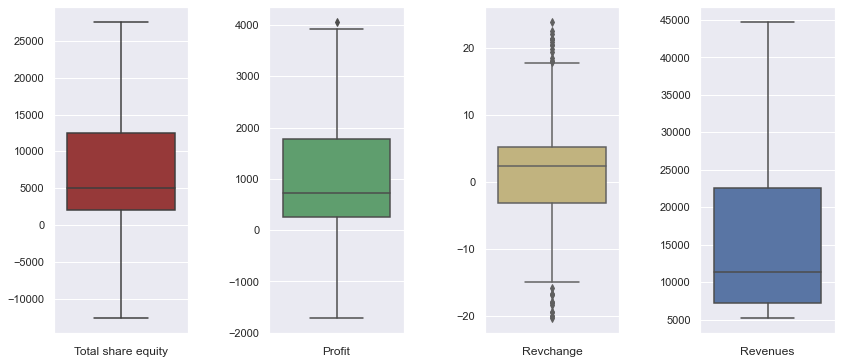

In [36]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(14, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.6) 

# draw boxplot for Total share equity in the 1st subplot
sns.boxplot(data=F500_data1['Totshequity2'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Total share equity')

# draw boxplot for Profits in the 2nd subplot
sns.boxplot(data=F500_data1['Profits2'], ax=ax[1], color='g')
ax[1].set_xlabel('Profit')

# draw boxplot for Revchange in the 3rd subplot
sns.boxplot(data=F500_data1['Revchange2'], ax=ax[2], color='y')
ax[2].set_xlabel('Revchange')

# # finally draw boxplot for Revenues in the 4th subplot
sns.boxplot(data=F500_data1['Revenues2'], ax=ax[3])
ax[3].set_xlabel('Revenues')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

In [ ]:
# As we can see, there are still more than 200,000 rows, the min is our lower limit and the
# max is the upper limit. That means the function was successful.

For n_clusters = 2 The average silhouette_score is : 0.6243731002384957
For n_clusters = 3 The average silhouette_score is : 0.5861315776596021
For n_clusters = 4 The average silhouette_score is : 0.5657580794298251
For n_clusters = 5 The average silhouette_score is : 0.5520632691981684
For n_clusters = 6 The average silhouette_score is : 0.542777837523744


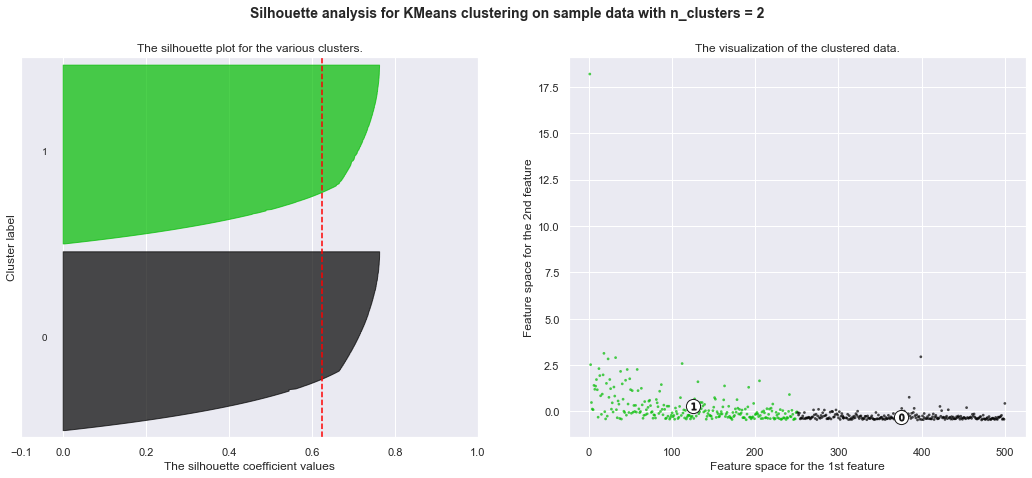

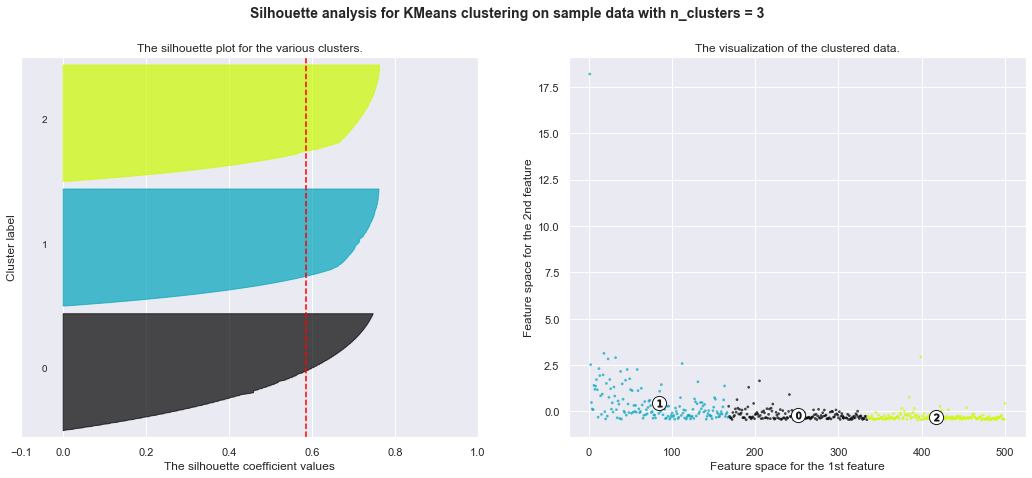

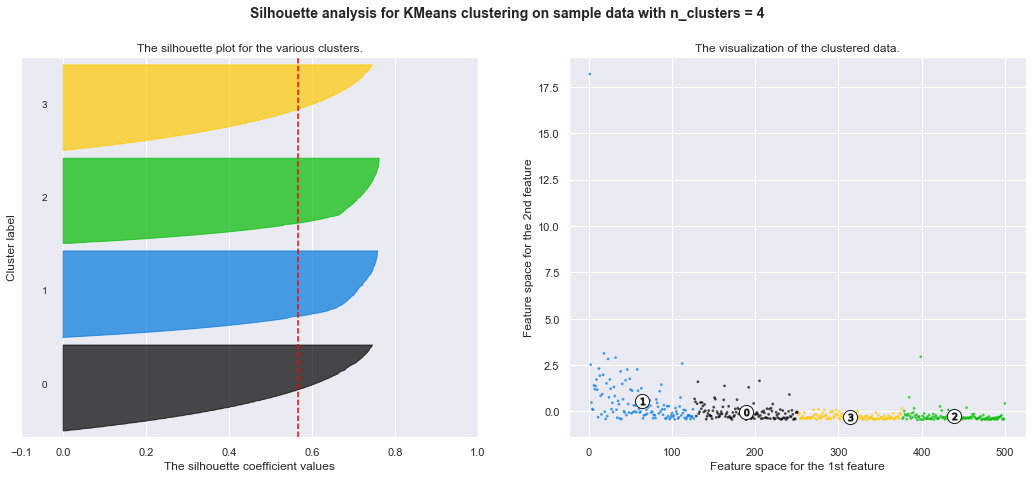

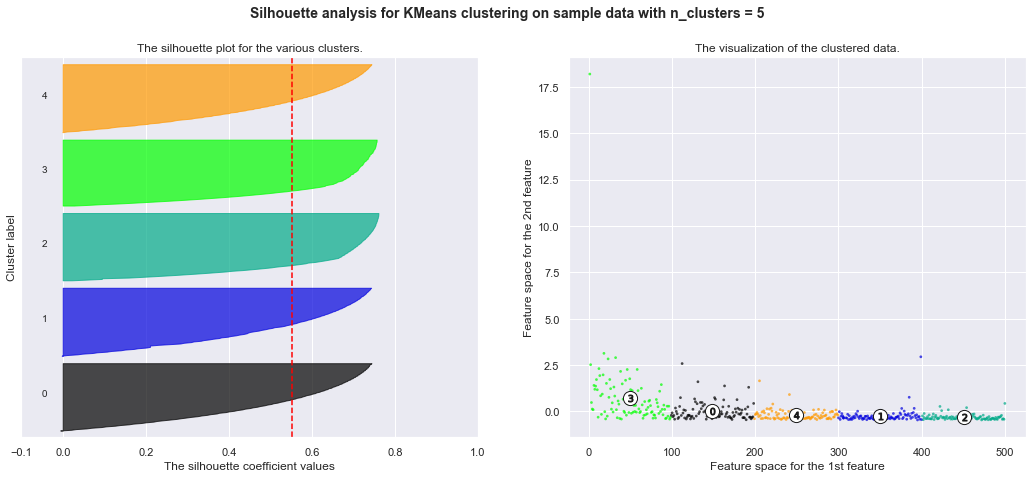

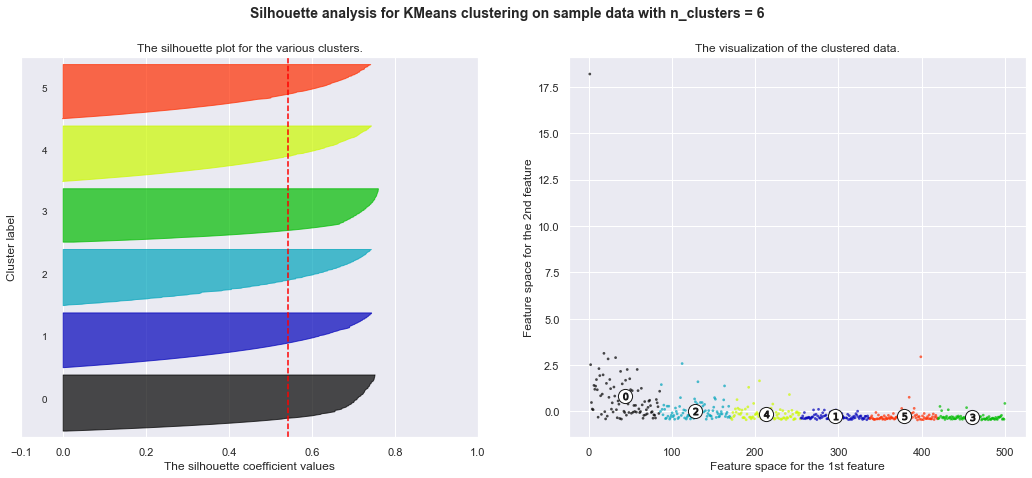

In [61]:
n_clusters = 3
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)   
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()